## Netflix Recommendation Enigne

# What are Recommender System
Recommender systems are algorithms designed to suggest relevant items to users. Thses systems are used in various domains such as e-commerce, streaming services and social media. THey enhance user experience by filtering vast amounts of information to other personalised content.

SVD (Singular Value Decomposition) in a recommendation system works by finding patterns in user preferences and item similarities. Here's a basic idea without going deep into the topic.

1) What the system has: A big table(matrix) with users on one side and items (like movies) on the other. User give ratings to items, but not everyone rated everything

2) What SVD does: SVD looks at the ratings that are available and tries to figure out the hidden connections between users and items. It learns what kind of movies users like base on their previous ratings

3) How it helps: Once SVD understands these patterns, it can predict how a user might rate a movie they haven't seen yet. Based on these predictions, the system recommends movies that the user is most likely to enjoy

4) Step by step implementation of SVD in a recommendation system:
- Install and import the libraries
- Load and prepare the dataset
- Train the SVD model
- Evaluate the Model
- Make predictions

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
netflix_dataset = pd.read_csv("combined_data_1.txt.zip", header = None,names = ['Cust_Id',"rating"] ,usecols = [0,1])

In [4]:
netflix_dataset

,Cust_Id,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [5]:
netflix_dataset.isnull().sum()

Cust_Id       0
rating     4499
dtype: int64

In [6]:
movie_count = netflix_dataset.isnull().sum()
movie_count = movie_count['rating']
movie_count

np.int64(4499)

In [7]:
total_count = netflix_dataset['Cust_Id'].nunique()

In [8]:
total_count

475257

In [9]:
rating_count = netflix_dataset['Cust_Id'].count() - movie_count
rating_count

np.int64(24053764)

In [10]:
customer_count = total_count - movie_count
customer_count

np.int64(470758)

In [11]:
stars = netflix_dataset.groupby('rating')['rating'].agg('count')
stars

rating
1.0    1118186
2.0    2439073
3.0    6904181
4.0    8085741
5.0    5506583
Name: rating, dtype: int64

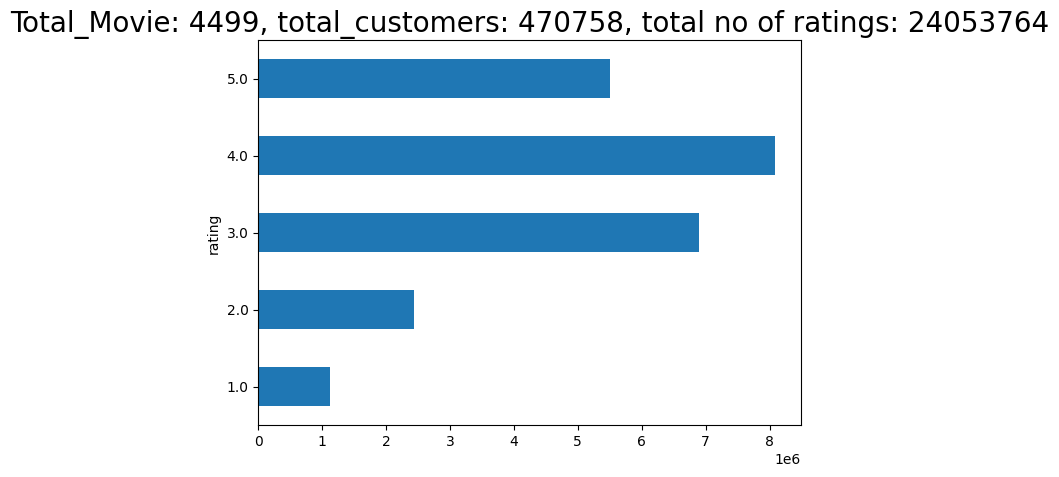

In [12]:
ax = stars.plot(kind = 'barh', legend = False, figsize = (7,5))
plt.title(f'Total_Movie: {movie_count}, total_customers: {customer_count}, total no of ratings: {rating_count}', fontsize = 20)
plt.show()

In [13]:
movie_id = None
movie_np = []

for i in netflix_dataset['Cust_Id']:
    if ':' in i:
        movie_id = int(i.replace(':', ""))
    movie_np.append(movie_id)

In [14]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [16]:
movie_np = np.array(movie_np).astype(np.int32)
netflix_dataset['Movie_Id'] = movie_np
netflix_dataset 

,Cust_Id,rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [18]:
netflix_dataset = netflix_dataset[netflix_dataset['rating'].notna()]
netflix_dataset

,Cust_Id,rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [19]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   rating    float64
 2   Movie_Id  int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 642.3+ MB


In [20]:
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

C:\Users\karan\AppData\Local\Temp\ipykernel_17660\2277237340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)


In [21]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int64  
 1   rating    float64
 2   Movie_Id  int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 642.3 MB


In [24]:
#pre - filtering

#removing the movies with less ratings ----- removed
#removing the people  who gave less number of ratings - no exp

In [23]:
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['rating'].agg(['count'])
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [25]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

np.float64(908.0)

In [29]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=2699)

In [30]:
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['rating'].agg(['count'])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [31]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6), 0)
cust_benchmark

np.float64(36.0)

In [32]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
len(drop_cust_list)

282042

In [33]:
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]

In [34]:
netflix_dataset

,Cust_Id,rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [35]:
# Load the second dataset for movie names as with previous dataset we only have movie id

df_title =pd.read_csv("Copy of movie_titles.csv",encoding="ISO-8859-1",header=None , names=["Movie_Id" , "Year" , "Name"] , usecols=[0,1,2])
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company
